# 문제 1

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [ ]:
from pandas import read_csv
df = read_csv('./data_22/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(len(df.columns))
print(df.columns)
print(df.nunique()) #outcome을 제외한 나머지는 수치형 변수로 보임

9
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
#결측치 없음, 이상치가 보임 (BloodPressure, BMI, Age)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


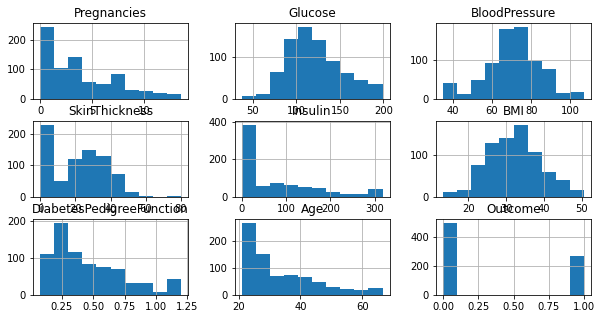

In [ ]:
#pregnancies, SkinThickness, Insulin, DiabetesPediagreeFunction, Age는 정규분포로 보이지 않음 
df.hist()
plt.show()

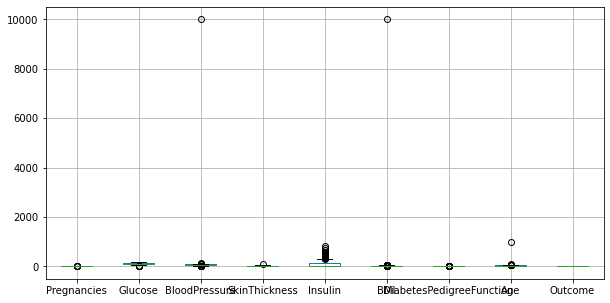

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] =(10,5)
df.boxplot()
plt.show()

### 1-2 이상치 처리(이상값 대체방안 제시)

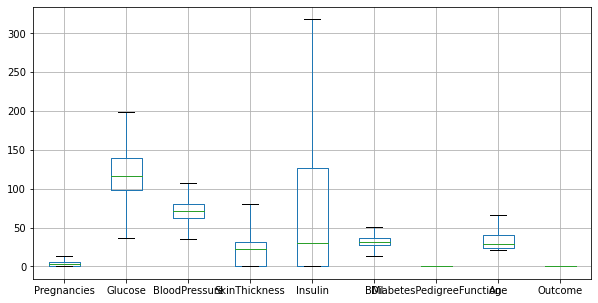

In [ ]:
#이상치를 삭제하는 대신 조정함으로써 이상치를 제거하면서 데이터의 수를 보전하기로 한다.
import pandas as pd

def win_outlier_Box(df):
    import pandas as pd
    for col in df.columns:
        if type(df[col][0])==str: #범주형 변수는 Pass
            continue
        else:
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            top = df[col].quantile(0.75) + IQR * 1.5
            down = df[col].quantile(0.25) - IQR * 1.5
            df[col] = df[col].clip(top, down)
    return df

df2 = win_outlier_Box(df)
df2.boxplot()
plt.show()

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [ ]:
#수치형 데이터에서 이상치를 적절하게 처리해야 한다.
#수치형 데이터 간의 스케일이 다를 경우 적절한 스케일링이 필요하다
from sklearn.preprocessing import StandardScaler
X = df2.drop('Outcome', axis=1)
y = df2['Outcome']

X2 = StandardScaler().fit_transform(X)
X2 = DataFrame(X2, columns=X.columns)
X2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252


# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros=RandomOverSampler()
oX, oy= ros.fit_resample(X2, y)
print("Before\n", y.value_counts())
print("After\n", oy.value_counts())

Before
 0    500
1    268
Name: Outcome, dtype: int64
After
 0    500
1    500
Name: Outcome, dtype: int64


### 2-2 언더샘플링 과정 설명하고 결과 작성

In [ ]:
rus=RandomUnderSampler()
uX, uy= rus.fit_resample(X2, y)
print("Before\n", y.value_counts())
print("After\n", uy.value_counts())

Before
 0    500
1    268
Name: Outcome, dtype: int64
After
 0    268
1    268
Name: Outcome, dtype: int64


### 2-3 둘 중 선택하고 이유 설명

In [ ]:
#데이터의 소실을 방지하기 위해 오버샘플링을 선택하겠음

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

In [ ]:
#분류 알고리즘으로 로지스틱 회귀, SVM, RF을 사용하겠다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(oX, oy)

#속도측면에서 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
import datetime as dt
start = dt.datetime.now()
LR = LogisticRegression()
LR.fit(X_train, y_train)
end = dt.datetime.now()
print("로지스틱 회귀 결과: train set 결정계수 {:.2f}, test set 결정계수 {:.2f}".format(LR.score(X_train, y_train), LR.score(X_test, y_test)))
print("소요시간", end-start)

#정확도 측면에서 RF
from sklearn.ensemble import RandomForestClassifier
start = dt.datetime.now()
RF = RandomForestClassifier(max_depth=5, min_samples_split=3)
RF.fit(X_train, y_train)
end = dt.datetime.now()
print("RF 결과: train set 결정계수 {:.2f}, test set 결정계수 {:.2f}".format(RF.score(X_train, y_train), RF.score(X_test, y_test)))
print("소요시간", end-start)

로지스틱 회귀 결과: train set 결정계수 0.74, test set 결정계수 0.75
소요시간 0:00:00.006051
RF 결과: train set 결정계수 0.86, test set 결정계수 0.83
소요시간 0:00:00.150474


### 3-2 모델 비교하고 결과 설명

In [ ]:
#두 모델 모두 train set과 test set의 결정계수가 비슷하게 나왔기 때문에 과적합되지 않고 적절하게 모델링되었다고 볼 수 있다.
#속도측면에서 선택한 로지스틱 회귀의 결정계수는 정확도 측면에서 선택한 RF보다 비교적 적게 나왔지만 소요 시간을 비교하면 로지스틱 회귀가 훨씬 빠른 것으로 나타났다.

In [ ]:
LR_pred = LR.predict(X_test)
RF_pred = RF.predict(X_test)

from sklearn.metrics import classification_report
print("로지스틱 회귀\n", classification_report(y_test, LR_pred))
print("RF\n", classification_report(y_test, RF_pred))

로지스틱 회귀
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       122
           1       0.78      0.71      0.74       128

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

RF
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.84      0.82      0.83       128

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [ ]:
#속도 개선을 위해 feature의 다중공선성을 제거하고 feature의 수를 줄이는 PCA를 진행할 수 있다. RF의 속도 개선을 위해 차원 축소 후, 모델링을 한 결과는 아래와 같다.

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
comp = pca.fit_transform(oX)

X_train, X_test, y_train, y_test = train_test_split(comp, oy)

start = dt.datetime.now()
RF = RandomForestClassifier(max_depth=5, min_samples_split=3)
RF.fit(X_train, y_train)
end = dt.datetime.now()
print("RF 결과: train set 결정계수 {:.2f}, test set 결정계수 {:.2f}".format(RF.score(X_train, y_train), RF.score(X_test, y_test)))
print("소요시간", end-start)

RF 결과: train set 결정계수 0.82, test set 결정계수 0.73
소요시간 0:00:00.141779


# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

In [ ]:
content = read_csv('./data_22/content.csv')
content

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232
...,...
195,100.568703
196,99.082193
197,100.163027
198,99.327200


### 4-1 연구가설과 귀무가설 작성

In [ ]:
#귀무가설: 금속 재질 함유량의 분산이 1.3과 차이가 없다
#연구가설: 금속 재질 함유량의 분산이 1.3과 차이가 있다

### 4-2 양측 검정

In [ ]:
from scipy.stats import chi2 
#ppf: 1-alpha, df로 카이제곱통계량 구하기
#pdf: df, 카이제곱통계량으로 pvalue 구하기

n = len(content)
df = n-1
pop_var = 1.3
samp_var = float(content.var(ddof=1))
alpha = 0.05
chi = df*samp_var/pop_var
computed = chi2.ppf(1-alpha, df)
pval = chi2.pdf(df, chi)

print("해당 케이스의 카이제곱통계량은 {:.2f}, 자유도는 {}, pvalue는 {:.2f}".format(chi, df, pval))
print("카이제곱분포표에서 df가 {}이고, 유의수준{}일 때 카이제곱통계량은 {:.2f}".format(df, alpha, computed))

#pvalue가 유의수준보다 적으므로 연구가설을 채택한다. 금속 재질 함유량의 분산이 1.3과 차이가 있다.

해당 케이스의 카이제곱통계량은 328.29, 자유도는 199, pvalue는 0.00
카이제곱분포표에서 df가 199이고, 유의수준0.05일 때 카이제곱통계량은 232.91


### 4-3 검정통계량, 가설 채택

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

In [ ]:
from pandas import DataFrame
error = read_csv('./data_22/error.csv')
error

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5
...,...,...
95,96,2.0
96,97,3.0
97,98,5.5
98,99,2.0


### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [ ]:
import numpy as np
errors = error['error_case_number']
CL = errors.mean()
std = errors.std() #ddof=1 ?
UCL = CL + std*3
LCL = CL - std*3
print("CL: {:.2f}, UCL: {:.2f}, LCL: {:.2f}".format(CL, UCL, LCL))

CL: 3.41, UCL: 13.36, LCL: -6.54


### 5-2 관리도 시각화

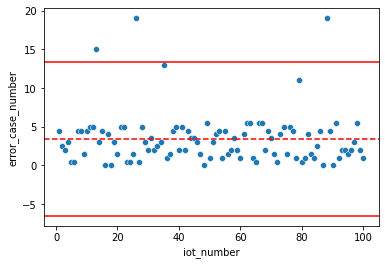

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x='iot_number', y='error_case_number', data=error)
plt.axhline(UCL, color='red')
plt.axhline(CL, color='red', linestyle='dashed')
plt.axhline(LCL, color='red')
plt.show()

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

In [ ]:
#귀무가설: 두 상품은 연관이 없다 (두 상품의 구매패턴은 무작위로 배열되어 있다)
#연구가설: 두 상품은 연관이 있다 (두 상품의 구매패턴은 무작위로 배열되어 있지 않다)

### 6-2 평균과 표준편차

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp
product = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b']
#어떻게 구하는 것일까...

### 6-3 가설 채택

In [ ]:
product2 = list(map(lambda x: 1 if x == 'a' else 0, product))
Z, p= runstest_1samp(product2, cutoff='mean')
print("Z통계량은 {:.2f}, p-value는 {:.2f}이다.".format(Z, p))
#p-value가 0.05보다 크기 때문에 귀무가설을 채택하며, 두 상품은 연관이 없다.

Z통계량은 -0.37, p-value는 0.71이다.
